# review_ML/DL

* 다음의 데이터를 이용하여 모델링 복습을 해 봅시다.
    * 데이터와 기본 라이브러리만 작성되어 있습니다.
    * 전처리와 모델링의 틀을 제공합니다.
    * 여러분이 가장 자신 있는 알고리즘을 이용하여 모델링하시오.
        * 가능하다면 튜닝도 시도하시오.
    * 성능 평가를 합니다.

## 1.환경준비

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2) 데이터 로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_all.csv'
data = pd.read_csv(path)
data.loc[data['Payment'] == 4, 'Payment'] = 3
data.head()

,Creditability,AccountBalance,Duration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuableAsset,Age,Apartment,CreditCount,Occupation,Dependents,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28,2,1,3,1,1,1
1,1,2,9,2,0,276,3,4,4,1,22,1,1,2,1,1,1
2,1,1,18,3,2,1049,2,2,4,2,21,1,1,3,1,1,1
3,1,1,24,3,1,6419,5,2,4,4,44,3,2,4,2,2,1
4,1,3,12,2,2,1424,5,2,4,1,55,2,1,4,1,2,1


|	칼럼명	|	설명	|	 	|	값 의미	|
|	-----	|	-----	|	-----	|	-----	|
|	Creditability	|	Creditability(Target)	|	향후 신용도	|	0 : Bad, 1 : Good	|
|	AccountBalance	|	Account Balance	|	은행잔고	|	1: No account, 2 : None (No balance), 3 : Some Balance	|
|	Duration	|	Duration of Credit (month)	|	신청한 대출기간(월)	|	숫자	|
|	Payment	|	Payment Status of Previous Credit	|	과거 대출 납입 상태	|	0 : 연체, 1 : 기타신용, 2 : 완납, 3 : 정상 대출상환 중 |
|	Purpose	|	Purpose	|	신청한 대출목적	|	1 : New Car , 2 : Used Car , 3 : Furniture , 4 : TV , 5 : Appliances , 6 : Repair , 8 : Vacation , 9 :Retraining , 10 : Business , 0 : Other	|
|	CreditAmount	|	Credit Amount($)	|	신청한 대출금액	|		|
|	Employment	|	Length of current employment(Month)	|	현 직업 근무 기간	|	1: Unemployed,  2: <1 Year,  3: [1, 4),  4: [4, 7),  5: Above 7	|
|	SexMarital	|	Sex & Marital Status	|	성별 & 결혼상태	|	1: Male, Divorced, 2: Male, Single , 3: Male, Married/Widowed , 4: Female	|
|	CurrentAddress	|	Duration in Current address	|	현 거주지 거주기간	|	1: <1 Year , 2: [1, 4) , 3: [4, 7) , 4: Above 7	|
|	MostValuable	|	Most valuable available asset	|	가장 가치있는 자산	|	1: None , 2: Car , 3: Life Insurance , 4: Real Estate	|
|	Age	|	Age (years)	|	나이	|		|
|	AppartmentType	|	Type of apartment	|	주거환경	|	1: free apartment, 2: Rented, 3: Owned	|
|	NoCredits	|	No of Credits at this Bank	|	현재 총 대출 건수	|	1 : one, 2 : 2 ~ 3, 3 : 4 ~ 5, 4 : 6 ~	|
|	Occupation	|	Occupation	|	직업	|	1: Unemployed, unskilled, 2: Unskilled Permanent Resident, 3: Skilled, 4: Executive	|
|	Telephone	|	Telephone	|	전화기 소유 여부	|	2: Yes , 1: No	|
|	ForeignWorker	|	Foreign Worker	|	외국인 근로자 여부	|	2: Yes , 1: No	|


* Target : Creditability
* 숫자형변수 : Duration, CreditAmount, Age
* 범주형변수 : 나머지

## 2.데이터 준비


### 1) x, y로 나누기 

In [3]:
target = 'Creditability'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

### 2) 가변수화

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Creditability      1000 non-null   int64
 1   AccountBalance     1000 non-null   int64
 2   Duration           1000 non-null   int64
 3   Payment            1000 non-null   int64
 4   Purpose            1000 non-null   int64
 5   CreditAmount       1000 non-null   int64
 6   Employment         1000 non-null   int64
 7   SexMarital         1000 non-null   int64
 8   CurrentAddress     1000 non-null   int64
 9   MostValuableAsset  1000 non-null   int64
 10  Age                1000 non-null   int64
 11  Apartment          1000 non-null   int64
 12  CreditCount        1000 non-null   int64
 13  Occupation         1000 non-null   int64
 14  Dependents         1000 non-null   int64
 15  Telephone          1000 non-null   int64
 16  ForeignWorker      1000 non-null   int64
dtypes: int64(17)
me

In [6]:
list(data)

['Creditability',
 'AccountBalance',
 'Duration',
 'Payment',
 'Purpose',
 'CreditAmount',
 'Employment',
 'SexMarital',
 'CurrentAddress',
 'MostValuableAsset',
 'Age',
 'Apartment',
 'CreditCount',
 'Occupation',
 'Dependents',
 'Telephone',
 'ForeignWorker']

In [ ]:
# cols_num = ['Duration', 'CreditAmount', 'Age']
# cols_cat = [x for x in list(x) if x not in cols_num]

In [4]:
cols_cat = ['Employment', 'CurrentAddress', 'CreditCount', 'Dependents', 'Telephone', 
              'AccountBalance', 'Payment', 'Purpose', 'SexMarital', 'MostValuableAsset', 
              'Apartment','Occupation','ForeignWorker']

x = pd.get_dummies(x, columns = cols_cat, drop_first = True)
x.head()

,Duration,CreditAmount,Age,Employment_2,Employment_3,Employment_4,Employment_5,CurrentAddress_2,CurrentAddress_3,CurrentAddress_4,...,SexMarital_4,MostValuableAsset_2,MostValuableAsset_3,MostValuableAsset_4,Apartment_2,Apartment_3,Occupation_2,Occupation_3,Occupation_4,ForeignWorker_2
0,24,1249,28,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,9,276,22,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,18,1049,21,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,24,6419,44,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
4,12,1424,55,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


### 3) train : validation 분할

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 20)

### 4) 스케일링

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

## 3.모델링
* 최소 3가지의 알고리즘을 이용하여 모델링을 수행하시오.
* 튜닝을 시도하시오.
* validation 셋으로 예측결과를 저장하시오.

In [9]:
# 사용될 라이브러리, 함수 로딩
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

### 1) 모델1

* KNN

In [46]:
params = {'n_neighbors':range(3, 100, 2), 'metric':['manhattan','euclidean']}

model1 = GridSearchCV(KNeighborsClassifier(), params, cv = 10)
model1.fit(x_train_s, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': range(3, 100, 2)})

In [48]:
model1.best_params_

{'metric': 'manhattan', 'n_neighbors': 15}

In [50]:
result = pd.DataFrame(model1.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001248,0.001378,0.006220,0.000926,manhattan,3,"{'metric': 'manhattan', 'n_neighbors': 3}",0.7000,0.6875,0.7250,0.6500,0.6750,0.6750,0.7250,0.7375,0.7125,0.6750,0.69625,0.026839,97
1,0.000786,0.000151,0.006360,0.000733,manhattan,5,"{'metric': 'manhattan', 'n_neighbors': 5}",0.7125,0.7250,0.7625,0.6875,0.6625,0.6750,0.7250,0.7250,0.7000,0.7000,0.70750,0.027500,94
2,0.000892,0.000104,0.006184,0.000197,manhattan,7,"{'metric': 'manhattan', 'n_neighbors': 7}",0.7500,0.7500,0.7375,0.7000,0.7000,0.7375,0.7125,0.7375,0.7250,0.6750,0.72250,0.023585,17
3,0.000918,0.000098,0.007345,0.002082,manhattan,9,"{'metric': 'manhattan', 'n_neighbors': 9}",0.7750,0.6750,0.7750,0.6875,0.6750,0.7375,0.7375,0.7125,0.6875,0.7250,0.71875,0.035904,29
4,0.000853,0.000035,0.006197,0.000133,manhattan,11,"{'metric': 'manhattan', 'n_neighbors': 11}",0.7625,0.6875,0.7750,0.6875,0.6875,0.7250,0.7125,0.6875,0.6875,0.7375,0.71500,0.032016,44


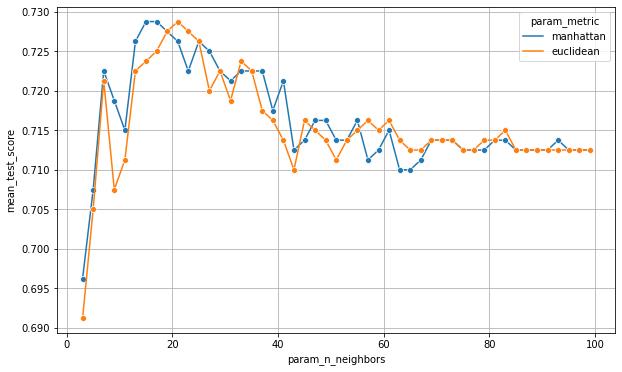

In [49]:
# 튜닝 과정 로그를 df로 저장
result = pd.DataFrame(model1.cv_results_)

plt.figure(figsize = (10,6))
sns.lineplot(x='param_n_neighbors', y='mean_test_score', data = result, 
             marker = 'o', hue = 'param_metric')
plt.grid()
plt.show()

In [12]:
pred1 = model1.predict(x_val_s)

### 2) 모델2

* SVM

In [41]:
params = {'C':[1, 10, 20, 30], 'gamma':np.linspace(0.001, 0.2, 50)}

model2 = GridSearchCV(SVC(), params, cv = 10)
model2.fit(x_train_s, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30],
                         'gamma': array([0.001     , 0.00506122, 0.00912245, 0.01318367, 0.0172449 ,
       0.02130612, 0.02536735, 0.02942857, 0.0334898 , 0.03755102,
       0.04161224, 0.04567347, 0.04973469, 0.05379592, 0.05785714,
       0.06191837, 0.06597959, 0.07004082, 0.07410204, 0.07816327,
       0.08222449, 0.08628571, 0.09034694, 0.09440816, 0.09846939,
       0.10253061, 0.10659184, 0.11065306, 0.11471429, 0.11877551,
       0.12283673, 0.12689796, 0.13095918, 0.13502041, 0.13908163,
       0.14314286, 0.14720408, 0.15126531, 0.15532653, 0.15938776,
       0.16344898, 0.1675102 , 0.17157143, 0.17563265, 0.17969388,
       0.1837551 , 0.18781633, 0.19187755, 0.19593878, 0.2       ])})

In [42]:
model2.best_params_

{'C': 10, 'gamma': 0.04567346938775511}

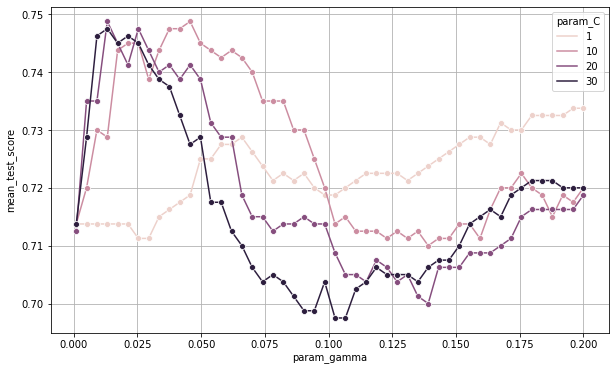

In [43]:
# 튜닝 과정 로그를 df로 저장
result = pd.DataFrame(model2.cv_results_)

plt.figure(figsize = (10,6))
sns.lineplot(x='param_gamma', y='mean_test_score', data = result, 
             marker = 'o', hue = 'param_C')
plt.grid()
plt.show()

In [16]:
pred2 = model2.predict(x_val_s)

### 3) 모델3

* random forest

In [17]:
model3 = RandomForestClassifier()
model3.fit(x_train, y_train)

pred3 = model3.predict(x_val)

### 4) 모델4

* xgb

In [51]:
params = {'learning_rate':np.linspace(0.01,0.5, 50), 'n_estimators':[150]}

model4 = GridSearchCV(XGBClassifier(), params, cv = 10, verbose = 2)
model4.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ]),
                         'n_estimators': [150]})

In [20]:
model4.best_params_

{'learning_rate': 0.11888888888888888, 'n_estimators': 150}

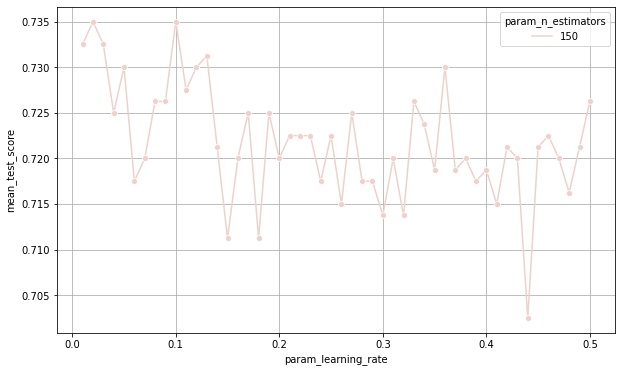

In [52]:
# 튜닝 과정 로그를 df로 저장
result = pd.DataFrame(model4.cv_results_)

plt.figure(figsize = (10,6))
sns.lineplot(x='param_learning_rate', y='mean_test_score', data = result, marker = 'o', hue = 'param_n_estimators')
plt.grid()
plt.show()

In [23]:
pred4 = model4.predict(x_val)

### 5) 모델5

* DL

In [24]:
n_features = x_train.shape[1]
n_features

41

In [28]:
model5 = Sequential([Dense(16, input_shape = (n_features, ), activation = 'relu'),
                     Dense(8, activation = 'relu'),
                     Dense(1, activation = 'sigmoid')])

model5.compile(optimizer = 'adam', loss = 'binary_crossentropy' ,  metrics=['accuracy'])
history = model5.fit(x_train_s, y_train, epochs = 50, validation_split = .2).history

Epoch 1/50
20/20 [==============================] - 1s 8ms/step - loss: 0.7898 - accuracy: 0.3109 - val_loss: 0.7205 - val_accuracy: 0.3875
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.4969 - val_loss: 0.6571 - val_accuracy: 0.6812
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6590 - accuracy: 0.6609 - val_loss: 0.6222 - val_accuracy: 0.7250
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6262 - accuracy: 0.7109 - val_loss: 0.5943 - val_accuracy: 0.7250
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.7094 - val_loss: 0.5791 - val_accuracy: 0.7250
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5864 - accuracy: 0.7109 - val_loss: 0.5696 - val_accuracy: 0.7250
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5753 - accuracy: 0.7109 - val_loss: 0.5628 - val_accuracy: 0.7250
Epoch 8/50
20/20 [==

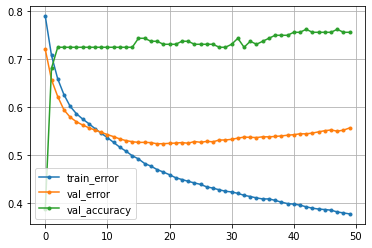

In [54]:
plt.plot(history['loss'], label = 'train_error', marker = '.')
plt.plot(history['val_loss'], label = 'val_error', marker = '.')
plt.plot(history['val_accuracy'], label = 'val_accuracy', marker = '.')
plt.legend()
plt.grid()
plt.show()

In [30]:
pred5 = model5.predict(x_val_s)
pred5 = np.where(pred5 >= .5, 1, 0)

7/7 [==============================] - 0s 2ms/step


## 4.모델 성능 비교
* 모델 중 성능이 가장 좋은 모델은?

In [55]:
model_no = ['m1','m2', 'm3','m4', 'm5']
algorithm = ['KNN','SVM', 'RF', 'XGB', 'DL']
pred = [pred1, pred2, pred3, pred4, pred5]

result = pd.DataFrame({'model_no':[], 'algorithm':[],'accuracy':[],'rec_0':[],'prec_0':[],'f1_0':[],'rec_1':[],'prec_1':[],'f1_1':[]})

for i in range(len(model_no)) :
    row = [model_no[i], algorithm[i]
           , accuracy_score(y_val, pred[i])
           , recall_score(y_val, pred[i], pos_label = 0)
           , precision_score(y_val, pred[i], pos_label = 0)
           , f1_score(y_val, pred[i], pos_label = 0)
           , recall_score(y_val, pred[i], pos_label = 1)
           , precision_score(y_val, pred[i], pos_label = 1)
           , f1_score(y_val, pred[i], pos_label = 1)]
    result.loc[i] = row

result

,model_no,algorithm,accuracy,rec_0,prec_0,f1_0,rec_1,prec_1,f1_1
0,m1,KNN,0.665,0.126761,0.642857,0.211765,0.961240,0.666667,0.787302
1,m2,SVM,0.740,0.422535,0.731707,0.535714,0.914729,0.742138,0.819444
2,m3,RF,0.730,0.323944,0.793103,0.460000,0.953488,0.719298,0.820000
3,m4,XGB,0.725,0.464789,0.660000,0.545455,0.868217,0.746667,0.802867
4,m5,DL,0.720,0.422535,0.666667,0.517241,0.883721,0.735484,0.802817


In [57]:
print(confusion_matrix(y_val, pred3))
print(classification_report(y_val, pred3))

[[ 23  48]
 [  6 123]]
              precision    recall  f1-score   support

           0       0.79      0.32      0.46        71
           1       0.72      0.95      0.82       129

    accuracy                           0.73       200
   macro avg       0.76      0.64      0.64       200
weighted avg       0.75      0.73      0.69       200

